In [37]:
# from email import message
from random import sample
from tabnanny import verbose
import pandas as pd # Used for reading the csv data
from nltk.corpus import stopwords
import string # For punctuation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.utils import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data Preparation

In [38]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [40]:
df = df.iloc[:, :2]

In [41]:
df.columns = ['target', 'message']

In [42]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [43]:
df['message_length'] = df.message.apply(len)

In [44]:
stopwords = stopwords.words("english")

In [45]:
def data_preparation(message):
    messages = df["message"]
    punctuations = string.punctuation

    words = []
    for word in message.split():
        word = word.lower()
        if word not in stopwords:
            chars = []
            for char in word:
                if char not in punctuations:
                    chars.append(char)
                else:
                    chars.append(" ")
            
            new_word = "".join(chars)
            words.append(new_word) 
    
    new_message = " ".join(words)
    
    return new_message

In [46]:
df['cleaned_message'] = df.message.apply(data_preparation)

# Modelling

In [47]:
targets = df.target
messages = df.cleaned_message
print(df.cleaned_message[1084])

love start attraction i feel need every time around me she first thing comes thoughts i would start day end her she every time dream love every breath name my life happen around her my life named her i would cry her will give happiness take sorrows i ready fight anyone her i love craziest things her love proove anyone girl beautiful lady whole planet i always singing praises her love start making chicken curry end makiing sambar life beautiful then will get every morning thank god day me i would like say lot  will tell later  


In [48]:
messages_train, messages_test, targets_train, targets_test = train_test_split(messages, targets, test_size=0.2, random_state=20)

In [49]:
mx = len(max(messages, key=len))

In [50]:
num_words = 50000 
max_len = 91

In [51]:
tokenizer = Tokenizer(num_words = num_words) 
tokenizer.fit_on_texts(messages_train)

In [57]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing import sequence
messages_train_features = tokenizer.texts_to_sequences(messages_train) # Updates internal vocabulary based on a list of sequences.
print(len(max(messages_train_features, key=len)))
messages_train_features = sequence.pad_sequences(messages_train_features, maxlen = max_len)

79


In [58]:
messages_test_features = tokenizer.texts_to_sequences(messages_test)
print(len(max(messages_test_features, key=len))) #91
messages_test_features = sequence.pad_sequences(messages_test_features, maxlen = max_len)

91


In [59]:
print(len(messages_train_features), len(messages_train_features[0]))
print(len(messages_test_features), len(messages_test_features[0]))

4457 91
1115 91


In [60]:
model = Sequential()

In [61]:
model.add(Embedding(num_words, 32, input_length=max_len))

In [62]:
model.add(LSTM(64))

In [63]:
model.add(Dense(16 ,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

In [65]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 91, 32)            1600000   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,625,889
Trainable params: 1,625,889
Non-trainable params: 0
_________________________________________________________________
None


# Training

In [66]:
history=model.fit(messages_train_features,targets_train,batch_size=150,epochs=20, validation_data=(messages_test_features, targets_test))

Epoch 1/20
30/30 [==============================] - 12s 206ms/step - loss: 0.5148 - accuracy: 0.8405 - val_loss: 0.3738 - val_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 5s 163ms/step - loss: 0.3222 - accuracy: 0.8728 - val_loss: 0.1791 - val_accuracy: 0.9283
Epoch 3/20
30/30 [==============================] - 5s 179ms/step - loss: 0.1077 - accuracy: 0.9735 - val_loss: 0.0523 - val_accuracy: 0.9865
Epoch 4/20
30/30 [==============================] - 5s 160ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 0.0328 - val_accuracy: 0.9928
Epoch 5/20
30/30 [==============================] - 5s 180ms/step - loss: 0.0180 - accuracy: 0.9966 - val_loss: 0.0324 - val_accuracy: 0.9919
Epoch 6/20
30/30 [==============================] - 5s 179ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0388 - val_accuracy: 0.9901
Epoch 7/20
30/30 [==============================] - 5s 162ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0353 - val_accuracy: 0.9928
Epoch

# Evaluation

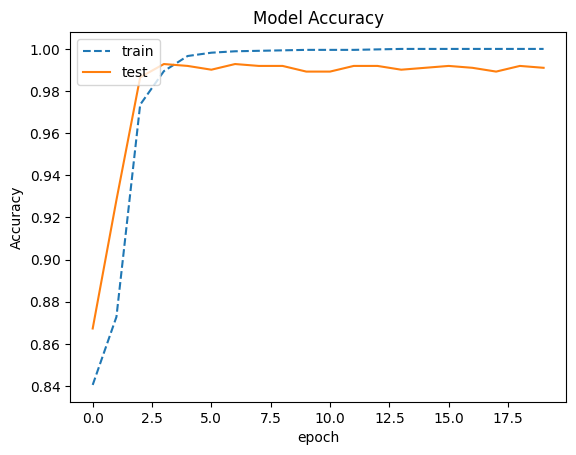

In [67]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

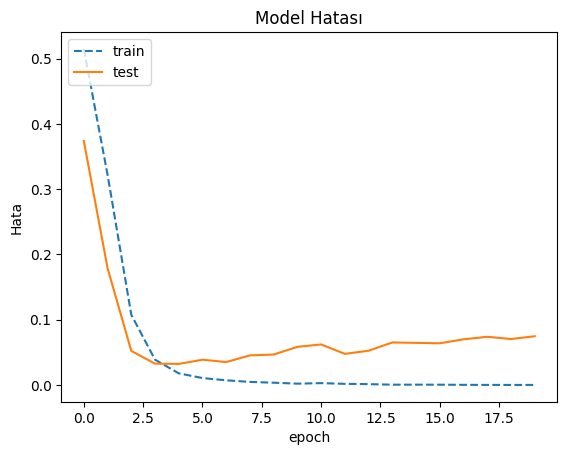

In [68]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [69]:
accuracy = model.evaluate(messages_test_features,targets_test)
print('Accuracy: {:0.3f}'.format(accuracy[1]*100))

35/35 [==============================] - 1s 23ms/step - loss: 0.0748 - accuracy: 0.9910
Accuracy: 99.103


In [70]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(messages_test_features)]
cf_matrix =confusion_matrix(targets_test,y_predict)
print(cf_matrix)

35/35 [==============================] - 2s 22ms/step
[[966   1]
 [  9 139]]


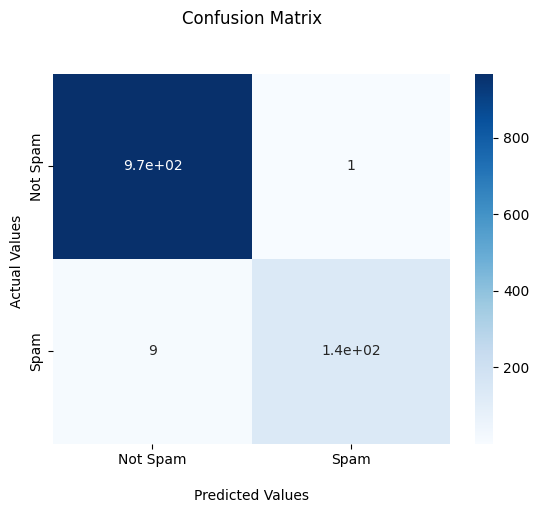

In [84]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Spam','Spam'])
ax.yaxis.set_ticklabels(['Not Spam','Spam'])
plt.show()